# Ultimate Interview Challenge

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import datetime
import json
from pandas.io.json import json_normalize

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

## Part 1 ‐ Exploratory data analysis
*The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.*

### Assessment:
Upon initial loading of the data, it's evident that there are issues with data quality. Timestamps in the original json file show the logins between 1-1-1970 and 4-13-1970. However, based on both the high-tech nature of the product and the timestamps in the other json file, it's safe to assume Ultimate hadn't launched their product in 1970 and that there's an issue converting from epoch to timestamp.  

I then grouped the logins with a count of logins over 15-minute intervals. The first plot in the time series shows the logins on a 15-minute basis. We can see some pretty consistent trends in the data, with what appear to be weekly trends (the low frequency wave) and hourly/daily trends (the high frequency spikes in data). Accordingly, I've plotted the aggregate log-in trends on an hourly, daily, weekly and monthly basis. The following graphs show:
- logins increased from Jan to March, peaked in March then decreased. 
- Throughout the week, logins increased steadily from Monday to Saturday, with a small decrease in logins from Sat to Sun. 
- Daily trends show a bimodal distribution; logins peak around 10pm & 2am, then decrease until 7/8am at which point logins increase until 11am/noon. The final dip in logins occurs around 5pm. 

In [158]:
# load json as string
json.load((open('logins.json')))

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [159]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [160]:
df.index = pd.to_datetime(df.login_time, unit='s')
df_grouped = df.groupby(pd.TimeGrouper(freq='15Min', label='right')).count()
df_grouped.rename(columns={'login_time':'count_logins'}, inplace=True)

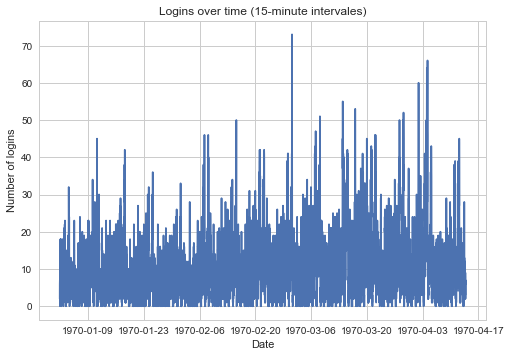

In [161]:
_ = plt.plot(df_grouped.count_logins)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of logins')
_ = plt.title('Logins over time (15-minute intervales)')
plt.show()

In [162]:
df_grouped['date'] = df_grouped.index.to_datetime()
df_grouped['hour'] = df_grouped.date.dt.hour
df_grouped['dayofweek'] = df_grouped.date.dt.dayofweek
df_grouped['week'] = df_grouped.date.dt.week
df_grouped['month'] = df_grouped.date.dt.month
df_grouped.head()

,count_logins,date,hour,dayofweek,week,month
login_time,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,20,3,1,1
1970-01-01 20:30:00,6,1970-01-01 20:30:00,20,3,1,1
1970-01-01 20:45:00,9,1970-01-01 20:45:00,20,3,1,1
1970-01-01 21:00:00,7,1970-01-01 21:00:00,21,3,1,1
1970-01-01 21:15:00,1,1970-01-01 21:15:00,21,3,1,1


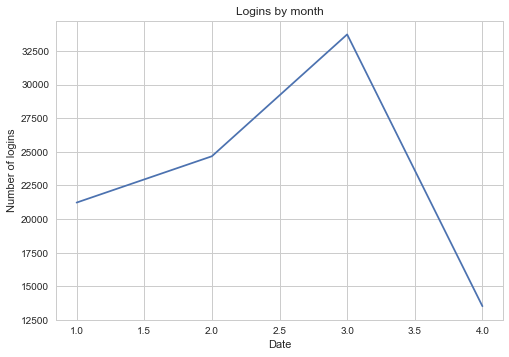

In [163]:
t = df_grouped.groupby(['month']).sum()
_ = plt.plot(t.count_logins)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of logins')
_ = plt.title('Logins by month')
plt.show()

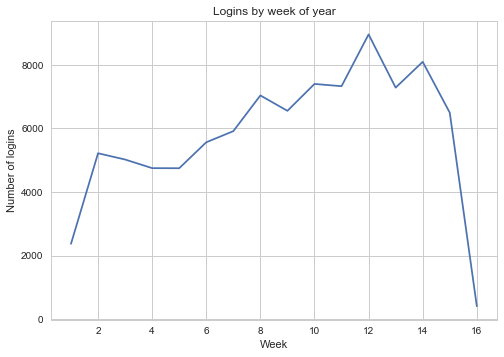

In [164]:
t = df_grouped.groupby(['week']).sum()
_ = plt.plot(t.count_logins)
_ = plt.xlabel('Week')
_ = plt.ylabel('Number of logins')
_ = plt.title('Logins by week of year')
plt.show()

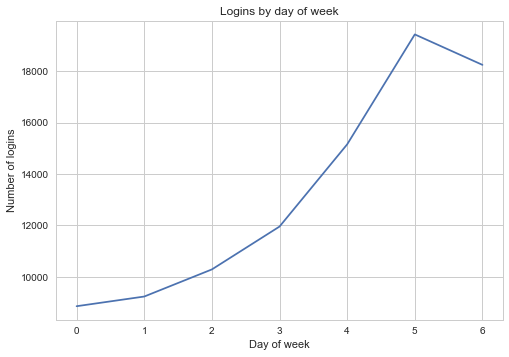

In [165]:
t = df_grouped.groupby(['dayofweek']).sum()
_ = plt.plot(t.count_logins)
_ = plt.xlabel('Day of week')
_ = plt.ylabel('Number of logins')
_ = plt.title('Logins by day of week')
plt.show()

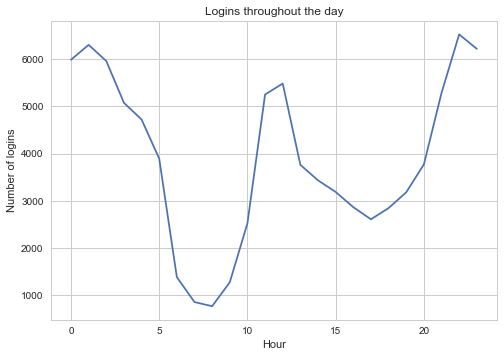

In [166]:
t = df_grouped.groupby(['hour']).sum()
_ = plt.plot(t.count_logins)
_ = plt.xlabel('Hour')
_ = plt.ylabel('Number of logins')
_ = plt.title('Logins throughout the day')
plt.show()

## Part 2 ‐ Experiment and metrics design
** Prompt** *The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.*
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

***
### 1. Key measure of success: 
To understand whether reimbursement of toll costs altered driver behavior, I'll first make a few assumptions: If toll reimbursement does encourage drivers to cross the bridge into the other cities, we can assume they would do so during peak demand hours. We should therefore see an increase in drivers available in each city during their respective weekday peak-hours. And, as a result, passengers should experience either shorter wait times, or cheaper fares due to a better supply/demand balance. 

This offers a few potential measures of success: 
- From a customer perspective: is wait-time shorter? 
- From Ultimate's perspective: does shorter wait time translate to better customer or driver retention (as measured by the number of rides)? Or, looking at the longer-term impact, does a better experience drive an influx of new drivers / passengers?

Ultimately the best metrics depends on the broader business strategy behind this program. Since rider wait time is a direct measure of the increase in drivers during peak time, I would use overall wait time as a measure for success.

***
### 2. Experimental design
To test the impact of Ultimate's initiative, I would perform a two-sample t-test which compares the mean of two populations -- the test (riders after the toll reimbursement program was implemented) and the control (riders before the toll reimbursement program was implemented). We have two approaches to create the two paired populations: 1) use the same subject before and after, or 2) create a paired design in which subjects in one group are matched with a subject in the other group to create similar subjects in each group. Since we're interested in overall wait times, not specific to certain riders, we'll use approach #2. The samples could be matched on attributes like historical rider patterns, average ratings of and by drivers, and willingness to pay for surge pricing. 

Additionally, to control for temporal fluctuations in rider demand, we would want to assess peak times in each city (when wait times would be highest). For example, we could create a set of paired samples and calculate average wait time for specific day/times for controls (e.g. the 30 days prior to the toll change), and tests (e.g. 30 days after implementation). We want to understand if the difference in the mean weight time is statistically significant. We will assume the wait times are normally distributed and use an alpha (significance level) of 0.05. 

The ultimate result will tell us with a known degree of certainty, whether the wait time in the test group is statistically significant vs. the control group. If the analysis shows statistically significant differences, then I would be encouraged to continue the program (and do a financial assessment for overall impact). If the results are not significant (depending on the cost), I would re-run the analysis at a later date with more data. Perhaps this sort of campaign takes 60, or even 90 days to really see a change. One additional caveat is that: As we saw above, there's a lot of temporal variation in rider demand and therefore presumably wait times. We've controlled for this by selecting similar times of the week/day, however, there are also seasonal and annual patterns that have not been considered. 

## Part 3 ‐ Predictive modeling
*Prompt: Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.*
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday


### Exploration
From the data exploration work below, we can learn quite a bit about this cohort. They typically take short trips (about 6 miles), with on sever outlier of 160. Two columns ('avg_rating_by_driver' & 'avg_rating_of_driver') have missing values; on further inspection, these missing values are from riders with just a few rides (the majority have 0 or 1 rides). We fill in the missing values below with the mean value per column.  Additionally, we see this cohort tends to ride with lower surge pricing.

Next, we flag users as active or non-active, where active users are defined as having logged into the app in the previous 30 days. The last trip date in the database is 2014-07-01, so we consider any rider active if they had a ride after 2014-06-01. With this definition, 37% of riders are active. 

In [225]:
# load json as string
json.load((open('ultimate_data_challenge.json')))

[{'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'city': "King's Landing",
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'signup_date': '2014-01-25',
  'surge_pct': 15.4,
  'trips_in_first_30_days': 4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2},
 {'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'signup_date': '2014-01-29',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0},
 {'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'signup_date': '2014-01-06',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 3,
  'ultimate_black_user': False,
  'weekday_pct': 100.0},
 {'avg_dist': 2.36,
  'avg_rating_by_driver

In [226]:
# load json as a pd dataframe
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
df_riders = pd.DataFrame(data)
df_riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [227]:
df_riders.fillna(df_riders.mean(), inplace = True)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [228]:
df_riders.last_trip_date.max()

'2014-07-01'

In [229]:
def active_flag(x):
    if x>='2014-06-01': return 1
    else: return 0
    
df_riders['flag_active'] = df_riders.last_trip_date.apply(active_flag)

In [230]:
def commute_flag(x):
    if x>=66.7: return 'commute'
    else: return 'social'
   
pd.to_numeric(df_riders.weekday_pct)
df_riders['personas'] = df_riders.weekday_pct.apply(commute_flag)

### Machine learning 
This is a supervised classification problem (is the user active or not?), and several binary classifiers could be appropriate here, including SVM, logistic regression, and random forest. We will use random forest so we can  understand the relative importance of features. Unlike other decision trees, random forests tend not to overfit. However, this approach is computationally complex and can be time consuming for real-time classification. 

#### Data wrangling
We first convert the data to a format appropriate for machine learning: 
- turn categorical variables (e.g. phone type, city) into boolean using one hot encoding.
- convert temporal variables like sign up date. 
- because all users in this cohort joined in January, we can extract just the day they joined. 
- remove last trip date since it's used to derive the target variable
- (not required) create user personas based on the percentage of weekday rides. The cutoff is up for further discover, but currently a rider with 67% of rides on weekdays is considered a commuter, and otherwise are a rider for social events. 

In [272]:
df_riders['signup_date'] = pd.to_datetime(df_riders.signup_date)
df_riders['sign_up_day'] = df_riders.signup_date.dt.day
df_riders['sign_up_dayofweek'] = df_riders.signup_date.dt.dayofweek

In [273]:
y = df_riders.flag_active.values
X = df_riders.drop(['flag_active', 'last_trip_date', 'signup_date'], axis = 1)
X2 = pd.get_dummies(X)
X2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,sign_up_day,sign_up_dayofweek,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,personas_commute,personas_social
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,25,5,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,29,2,1,0,0,1,0,0,1
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,6,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,10,4,0,1,0,0,1,1,0
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,27,0,0,0,1,1,0,1,0


### Evaluation
Based on the feature importance table above, we can see that the most important indicators of an active user are (in order): average distance of rides since joining, percentage of rides on weekdays, the day on which the user signed up, avg rating *by* the driver, number of trips in the first 30 days.

However, this initial random forest model shows 75.5% accuracy (number of true positives and true negatives out of all samples), and an F1 score of 64% (where 100% would indicate perfect precision and recall - or no false negatives and false positives). This analysis would benefit from additional refinement to reduce the number of false positives & false negatives predicted.

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state=42) 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
feature_imp = rfc.feature_importances_
y_pred = rfc.predict(X_test)
pd.DataFrame(feature_imp*100, index=X_train.columns, columns=['Feature Importance'])

,Feature Importance
avg_dist,18.646621
avg_rating_by_driver,8.990447
avg_rating_of_driver,6.970144
avg_surge,6.486367
surge_pct,6.769494
trips_in_first_30_days,7.453658
ultimate_black_user,3.387060
weekday_pct,12.946743
sign_up_day,10.097612
sign_up_dayofweek,5.996463


In [283]:
y_pred = rfc.predict(X_test)
accuracy = rfc.score(X_test, y_test)
roc = metrics.roc_auc_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test)
print('Accuracy: {}, Roc: {}, F1: {}'.format(accuracy,roc,f1))

Accuracy: 0.7556, Roc: 0.7433960310064858, F1: 0.6419921875


In [282]:
total = len(y_test)*.01
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred).ravel()
print('tn: {}, fp: {}, fn: {}, tp: {}'. format(tn/total, fp/total, fn/total, tp/total))

tn: 53.64666666666667, fp: 8.88, fn: 15.56, tp: 21.913333333333334


### Business implications
Ultimate could leverage these indicators of an 'active' user in several ways. The preliminary assessment shows that distance and weekday usage are strong predictors of retention. Ultimate could offer promotions that drive these desired behaviors in new riders (e.g. discount on a ride over a certain distance, discounts on weekday rides for the first 2 weeks after sign up). 